In [46]:
import json
import folium
import requests
from data_keys import ScoringKeys as SK, LocationKeys as LK, CoordinateKeys as CK, GeneralKeys as GK
from api import getGeneralData, getMapData, getGame
from dotenv import load_dotenv
import os

In [47]:
load_dotenv()
apiKey = os.environ["apiKey"]
mapNames = ['goteborg','uppsala','linkoping','vasteras']

# Load Map and General data

In [48]:
##Get map data from Considition endpoint
mapEntities = {}
for mapName in mapNames:
    mapEntities[mapName] = getMapData(mapName, apiKey)

https://api.considition.com
https://api.considition.com
https://api.considition.com
https://api.considition.com


In [49]:
##Get non map specific data from Considition endpoint
generalData = getGeneralData()

# Graph

In [50]:
from algorithms import create_graph
import matplotlib.pyplot as plt
import networkx as nx

In [51]:
graphs = {}
for mapName, mapEntity in mapEntities.items():
    graphs[mapName] = create_graph(mapEntity, generalData)

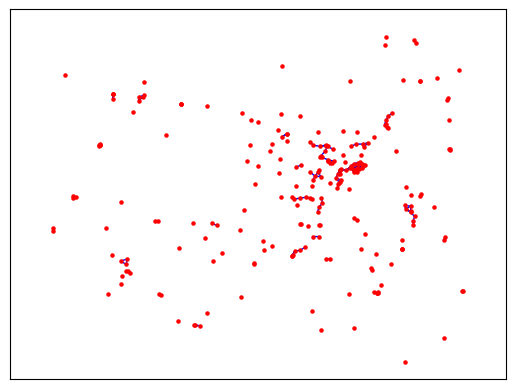

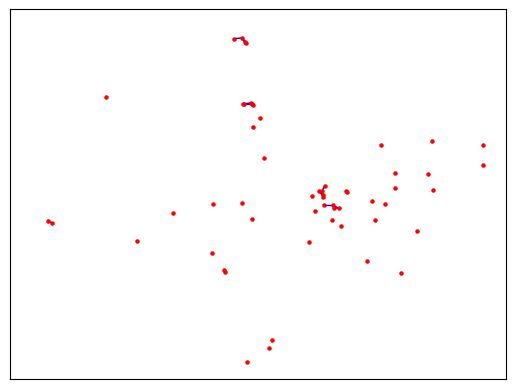

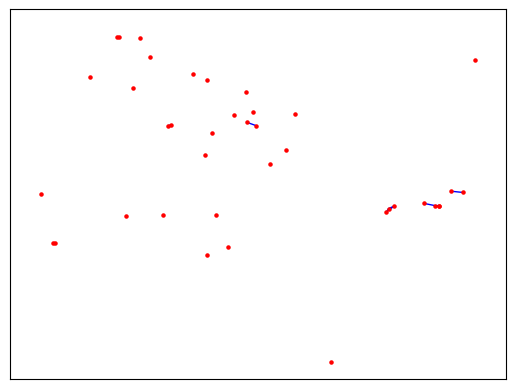

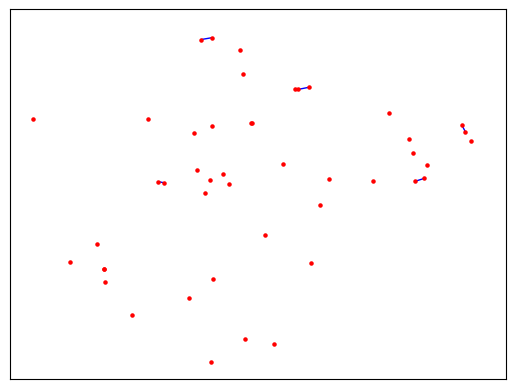

In [52]:
for mapName in mapEntities:
    coor = {node: (attr[CK.latitude], attr[CK.longitude]) for node, attr in graphs[mapName].nodes.data()}
    nx.draw_networkx(graphs[mapName], coor, node_size=5, node_color='red', edge_color='blue', with_labels=False)
    plt.show()

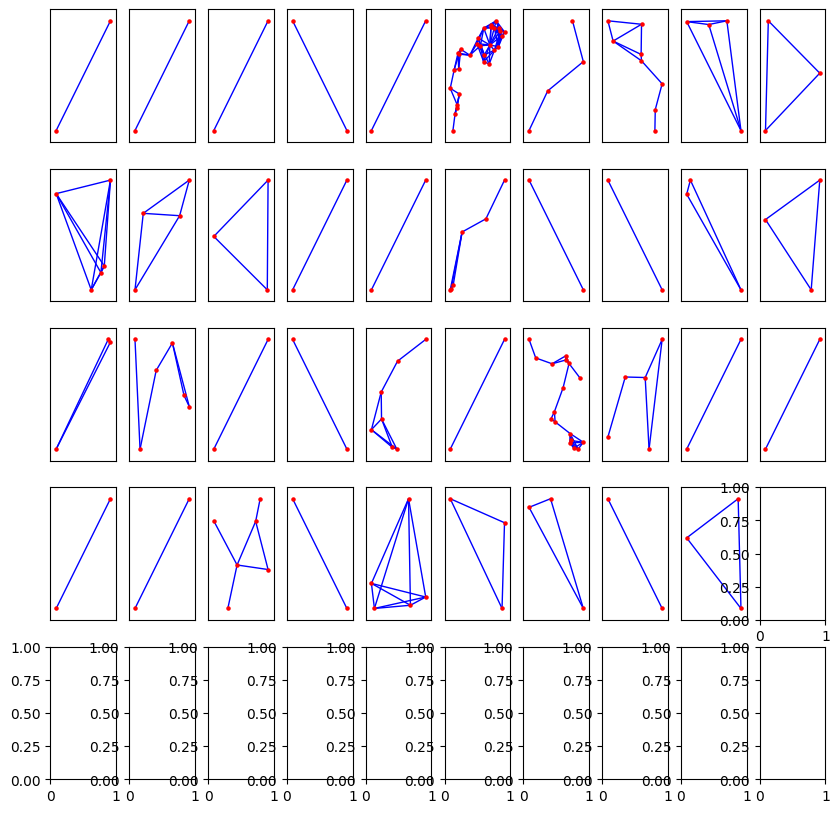

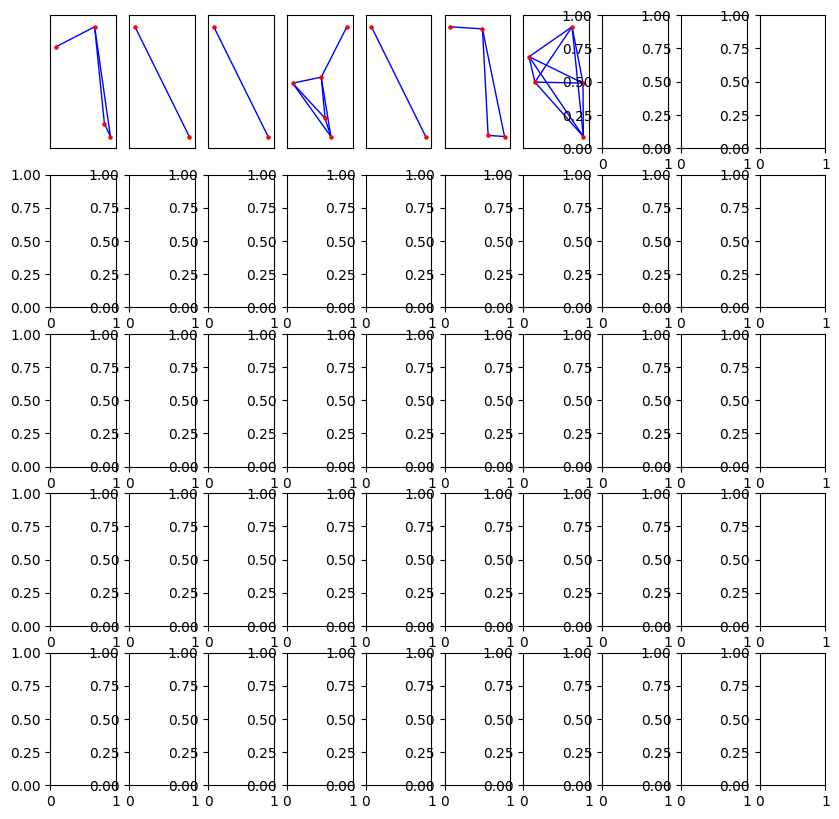

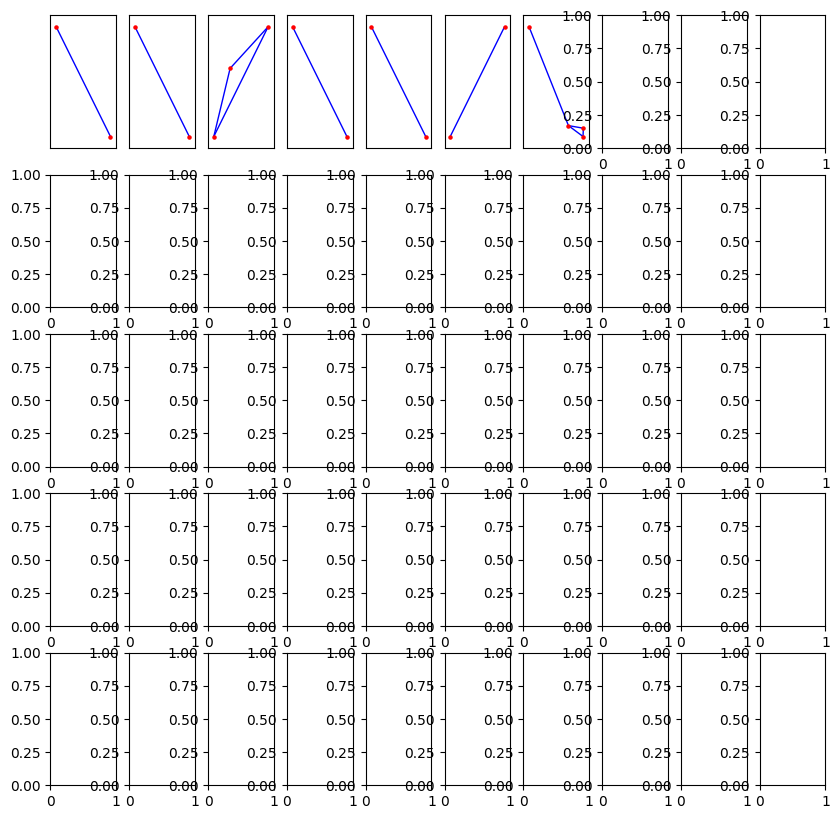

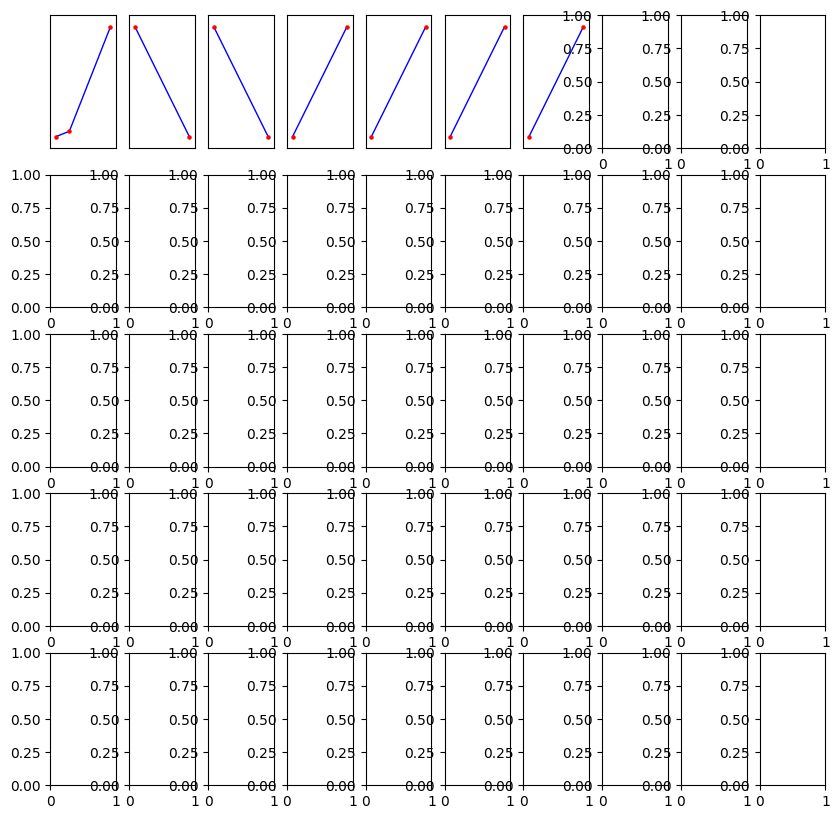

In [59]:
for mapName in mapEntities:
    G = graphs[mapName]
    fig, axs = plt.subplots(5, 10, figsize=(10, 10))
    count = 0
    for C in nx.connected_components(G):
        S = G.subgraph(C)
        if len(S) == 1:
            continue
        coor = {node: (attr[CK.latitude], attr[CK.longitude]) for node, attr in S.nodes.data()}
        nx.draw_networkx(S, coor, node_size=5, node_color='red', edge_color='blue', with_labels=False,ax=axs[count//10,count%10]) 
        count+=1
        assert count < 50
    plt.show()